In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc
from sklearn.model_selection import train_test_split
from scripts.proj1_helpers import create_csv_submission, load_csv_data

In [2]:
# y_test, X_test, ids_test = load_csv_data('data/test.csv')
# y_dev, X_dev, ids_dev = load_csv_data('data/train.csv')

In [3]:
dev_df = pd.read_csv('data/train.csv')
del dev_df["Id"]
dev_df = dev_df.drop_duplicates().copy()
dev_df["Prediction"] = dev_df["Prediction"].apply(lambda x: 1 if x == "s" else 0)

train_df, val_df = train_test_split(dev_df, test_size=0.2, stratify=dev_df["Prediction"])
train_df, val_df = train_df.reset_index(drop=True).copy(), val_df.reset_index(drop=True).copy()

test_df = pd.read_csv('data/test.csv')

In [4]:
train_df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0,267.426,64.808,189.901,51.268,-999.000,-999.000,-999.000,3.731,12.657,...,1.657,184.275,1,39.118,1.888,-0.049,-999.000,-999.000,-999.000,39.118
1,0,-999.000,89.144,64.420,1.763,-999.000,-999.000,-999.000,2.203,1.763,...,0.278,63.387,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
2,0,224.925,93.638,219.324,24.441,-999.000,-999.000,-999.000,3.603,19.640,...,-2.203,128.947,1,33.896,3.340,-1.962,-999.000,-999.000,-999.000,33.896
3,1,-999.000,47.075,67.180,45.319,4.053,426.282,-3.867,2.139,69.440,...,2.456,163.000,2,70.998,2.515,-2.718,44.683,-1.538,-1.389,115.681
4,0,117.779,66.768,101.201,30.125,-999.000,-999.000,-999.000,2.712,30.125,...,-0.727,159.818,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000


In [5]:
train_df.describe()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.342670,-48.701275,49.268932,81.270634,57.963078,-708.752163,-601.557732,-709.690014,2.373108,18.907249,...,-0.011571,209.841638,0.978295,-348.406082,-399.348139,-399.352736,-692.758304,-709.451362,-709.450654,73.005000
std,0.474603,406.216150,35.406529,41.079497,63.855480,454.328467,657.857019,452.863583,0.783179,22.371120,...,1.812704,126.309405,0.976585,532.998172,489.356808,489.353120,479.668749,453.234355,453.235199,97.782933
min,0.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,0.000000,78.154750,19.260750,59.376750,14.079750,-999.000000,-999.000000,-999.000000,1.810000,2.828000,...,-1.576000,123.079500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,0.000000,105.089000,46.531500,73.799000,38.455000,-999.000000,-999.000000,-999.000000,2.492000,12.302000,...,-0.025000,179.749500,1.000000,38.947000,-1.877000,-2.098000,-999.000000,-999.000000,-999.000000,40.461000
75%,1.000000,130.679750,73.615250,92.315250,79.125000,0.486250,83.294500,-4.647000,2.961000,27.583000,...,1.559000,263.628250,2.000000,75.401000,0.432000,0.508000,33.669000,-2.460000,-2.289000,109.977000
max,1.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.648000,5.684000,2834.999000,...,3.142000,1733.037000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


<AxesSubplot:>

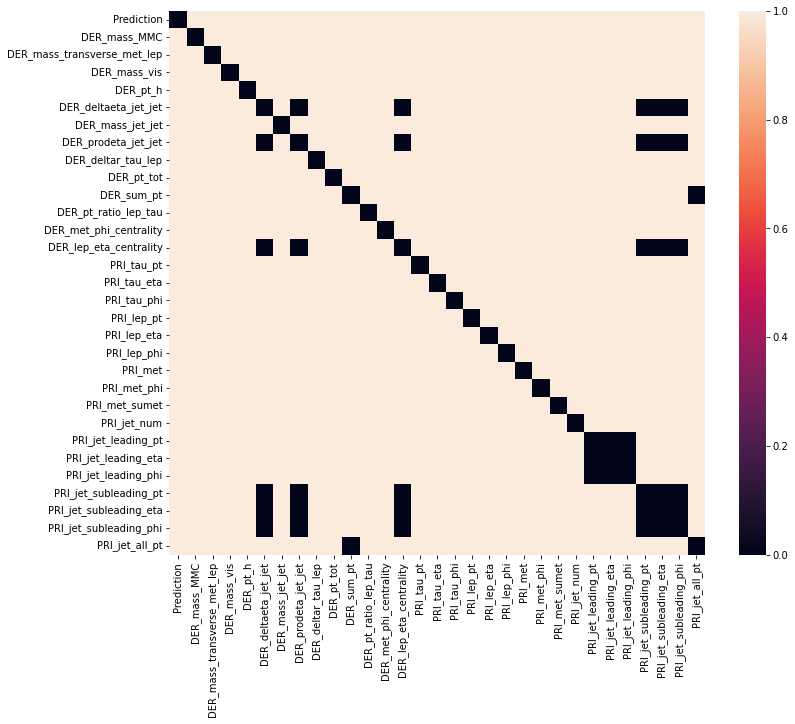

In [6]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

In [7]:
useless = [
    'DER_deltaeta_jet_jet', 
    'DER_prodeta_jet_jet',
    'DER_lep_eta_centrality', 
    'PRI_jet_subleading_eta',
    'PRI_jet_subleading_phi', 
    'PRI_jet_leading_eta', 
    'PRI_jet_leading_phi', 
    'DER_sum_pt', 
]

for col in useless:
    del train_df[col]
    del val_df[col]
    del test_df[col]

<AxesSubplot:>

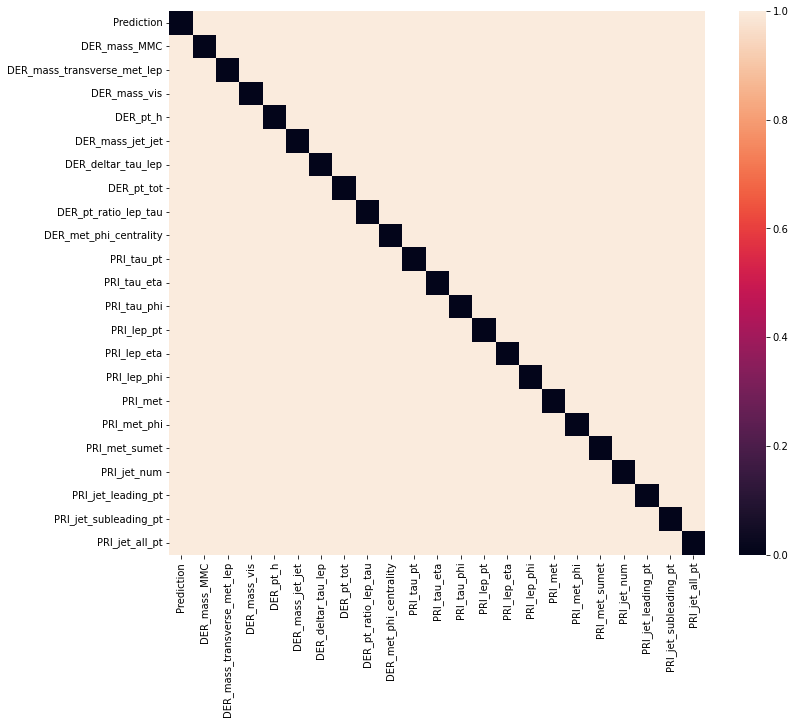

In [8]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

<AxesSubplot:>

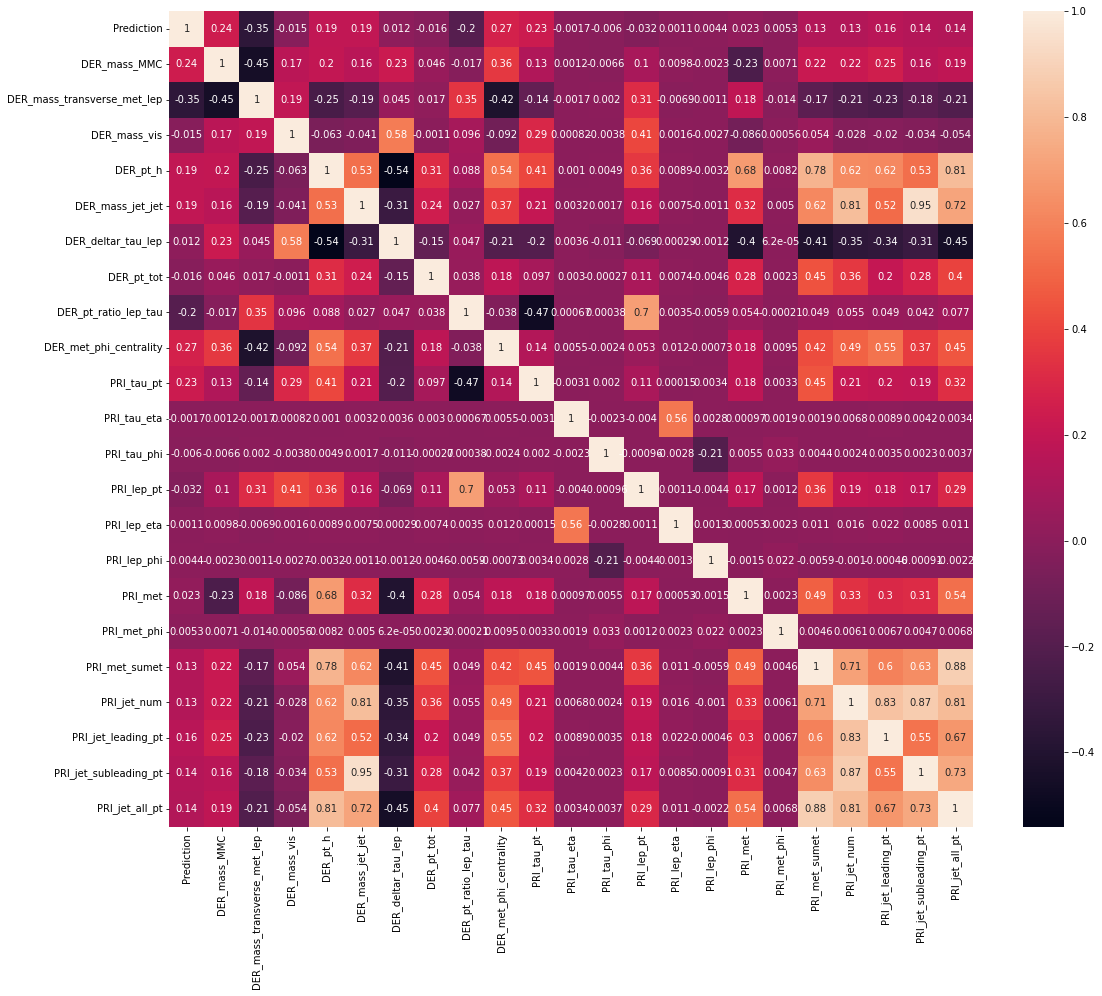

In [9]:
plt.figure(figsize=(18,15))
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)

In [10]:
import numpy as np

In [11]:
def preprocessing(df):
    df[df < -998.000] = np.nan
    df.fillna(df.mean(), inplace=True)
    df["PRI_lep_pt"] = np.log(df["PRI_lep_pt"].values - df["PRI_lep_pt"].values.min() + 0.0001)
    df["PRI_tau_pt"] = np.log(df["PRI_tau_pt"].values - df["PRI_tau_pt"].values.min() + 0.0001)
    df["DER_pt_ratio_lep_tau"] = np.log(df["DER_pt_ratio_lep_tau"].values)
    df["PRI_tau_eta"] = np.log(df["PRI_tau_eta"].values - df["PRI_tau_eta"].values.min() + 0.0001)
    df["PRI_jet_all_pt"] = np.log(df["PRI_jet_all_pt"].values - df["PRI_jet_all_pt"].values.min() + 0.0001)
    df["DER_met_phi_centrality"] = 1 / (df["DER_met_phi_centrality"].values - df["DER_met_phi_centrality"].values.min() + 1)
    
    return df

train_df = preprocessing(train_df)
val_df = preprocessing(val_df)

In [13]:
features_to_cut = [
    'DER_mass_MMC', 'DER_mass_transverse_met_lep',
    'DER_mass_vis', 'DER_pt_h', 'DER_mass_jet_jet', 'DER_deltar_tau_lep',
    'DER_pt_tot', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
    'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
    'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
    'PRI_jet_leading_pt', 'PRI_jet_subleading_pt',
]

In [14]:
mask_995 = train_df[features_to_cut].stack().quantile(0.9999)
mask_005 = train_df[features_to_cut].stack().quantile(0.0001)
train_df = train_df.loc[((train_df.loc[:, features_to_cut] < mask_995) & (train_df.loc[:, features_to_cut] > mask_005)).all(axis=1)]

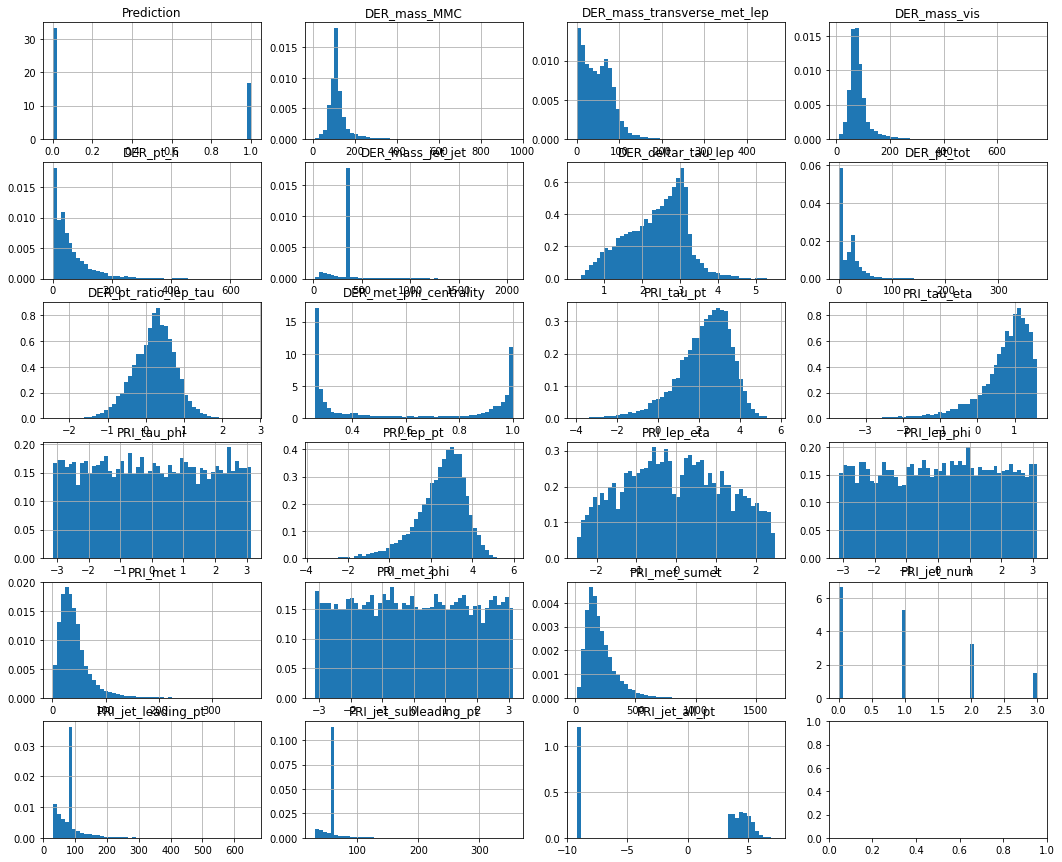

In [15]:
fig, axs = plt.subplots(6, 4, figsize=(18,15))
columns = train_df.columns
for i in range(23):
    train_df.loc[:10000, columns[i]].hist(
        bins=50, 
        density=True, 
        ax=axs[i // 4, i % 4], 
    )
    axs[i // 4, i % 4].set_title(columns[i])

In [16]:
from implementations import ridge_regression

In [17]:
train_df = pd.concat([train_df, pd.get_dummies(train_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del train_df["PRI_jet_num"]
val_df = pd.concat([val_df, pd.get_dummies(val_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del val_df["PRI_jet_num"]
test_df = pd.concat([test_df, pd.get_dummies(test_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del test_df["PRI_jet_num"]


In [18]:
y_column = "Prediction"
X_columns = [col for col in train_df.columns if col != y_column]

In [19]:
X_train, y_train = train_df[X_columns].values, train_df[y_column].values
X_val, y_val = val_df[X_columns].values, val_df[y_column].values
X_train = np.concatenate([X_train, np.ones(X_train.shape[0]).reshape(-1, 1)], axis=1)
X_val = np.concatenate([X_val, np.ones(X_val.shape[0]).reshape(-1, 1)], axis=1)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

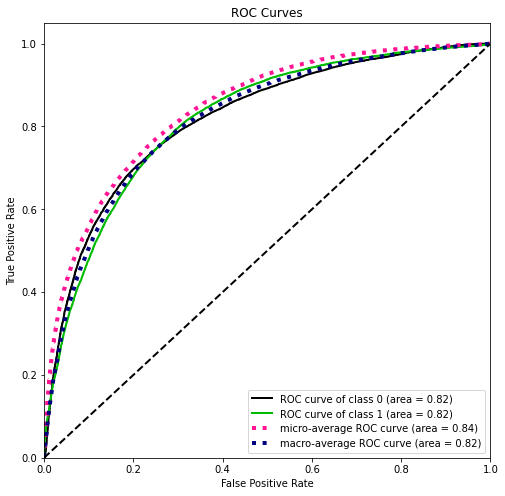

In [20]:
w_pure = ridge_regression(y_train, X_train, lambda_=0.)
y_pred = (X_val @ w_pure).reshape(-1, 1)
y_pred = np.concatenate([1 - y_pred, y_pred], axis=1)
plot_roc(y_val, y_pred, figsize=(8,8))

In [21]:
from scripts.proj1_helpers import create_csv_submission, load_csv_data

In [22]:
X = train_df[['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_mass_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_leading_pt', 'PRI_jet_subleading_pt', 'PRI_jet_all_pt',
       'PRI_jet_num_0', 'PRI_jet_num_1', 'PRI_jet_num_2', 'PRI_jet_num_3']].values
y = train_df[['Prediction']].values

<AxesSubplot:title={'center':'PCA Component Explained Variances'}, xlabel='First n principal components', ylabel='Explained variance ratio of first n components'>

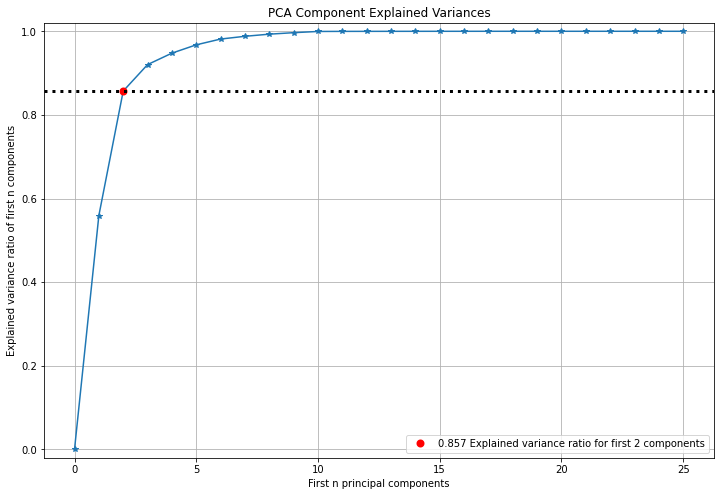

In [23]:
from sklearn.decomposition import PCA
from scikitplot.decomposition import plot_pca_component_variance
pca = PCA(random_state=1)
pca.fit(X)
plot_pca_component_variance(pca, figsize=(12,8))

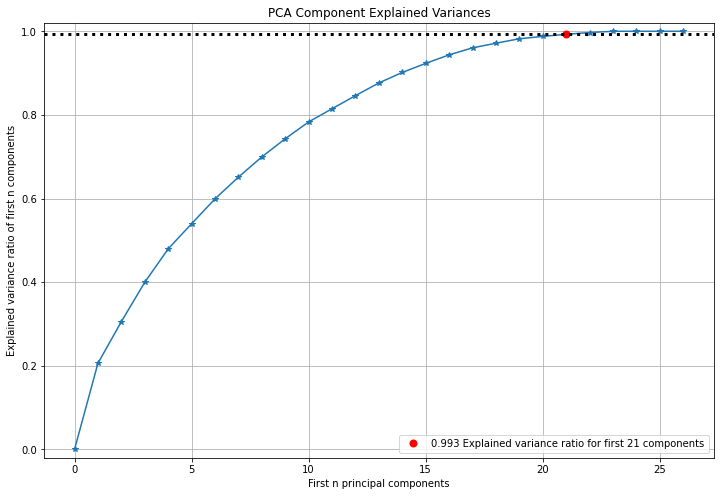

In [24]:

from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler

pca = PCA(random_state=1)
preproc = StandardScaler()
preproc.fit(X_train)
pca.fit(preproc.transform(X_train))
plot_pca_component_variance(pca, figsize=(12,8), target_explained_variance=0.99)
ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(ratio == ratio[ratio > 0.99][0])[0][0] + 1

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

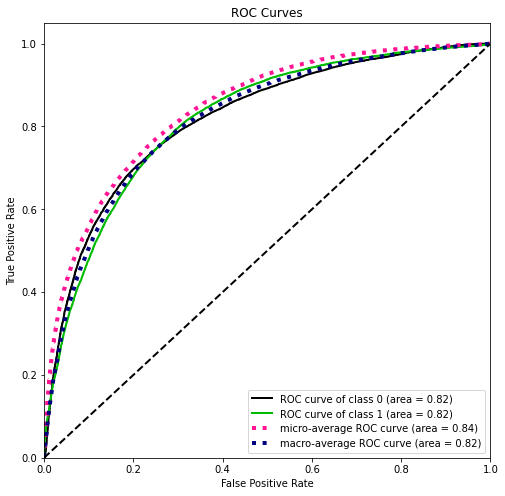

In [25]:
w_pure = ridge_regression(y_train, X_train, lambda_=0.)
y_pred = (X_val @ w_pure).reshape(-1, 1)
y_pred = np.concatenate([1 - y_pred, y_pred], axis=1)
plot_roc(y_val, y_pred, figsize=(8,8))

In [26]:
pca = PCA(random_state=1, n_components=2)
preproc = StandardScaler()
preproc.fit(X_train)
pca.fit(preproc.transform(X_train))
X_pca = pca.transform(preproc.transform(X_train))[:100, :]
y_pca = y[:100]

In [27]:
v2c = {
    1: "red",
    0: "blue"
}

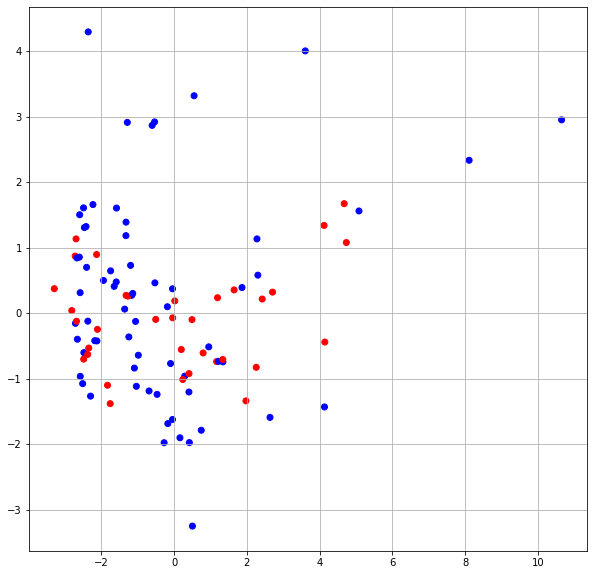

In [28]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(X_pca[:,0], X_pca[:,1], c=[v2c[y_] for y_ in y_pca.reshape(-1)])
plt.show()

In [29]:
def pca(X, n_components: int):
    mean = np.mean(X, axis=0)
    sigma = np.cov(X)
    values, components = np.linalg.eig(V)
    transformed = vectors.T @ X
    return transformed, vectors, values


In [30]:
X_train = np.concatenate([X_train, np.ones(X_train.shape[0]).reshape(-1, 1)], axis=1)

In [ ]:
np.ones(10).reshape(-1, 2).shape

In [ ]:
'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_mass_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_leading_pt', 'PRI_jet_subleading_pt', 'PRI_jet_all_pt',
       'PRI_jet_num_0', 'PRI_jet_num_1', 'PRI_jet_num_2', 'PRI_jet_num_3'

In [ ]:
plt.hist(np.log(train_df["PRI_lep_pt"].values - train_df["PRI_lep_pt"].values.min() + 0.001))
plt.show()

In [ ]:
train_df["DER_pt_ratio_lep_tau"] = np.log(train_df["DER_pt_ratio_lep_tau"].values)

In [ ]:
plt.hist(np.log(train_df["DER_pt_ratio_lep_tau"].values))
plt.show()

In [ ]:
plt.hist(np.log(train_df["PRI_tau_pt"].values - train_df["PRI_tau_pt"].values.min() + 0.0001))
plt.show()